<a href="https://colab.research.google.com/github/ukasz21/learning/blob/main/ml_tutorials/ml_fromscratch/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

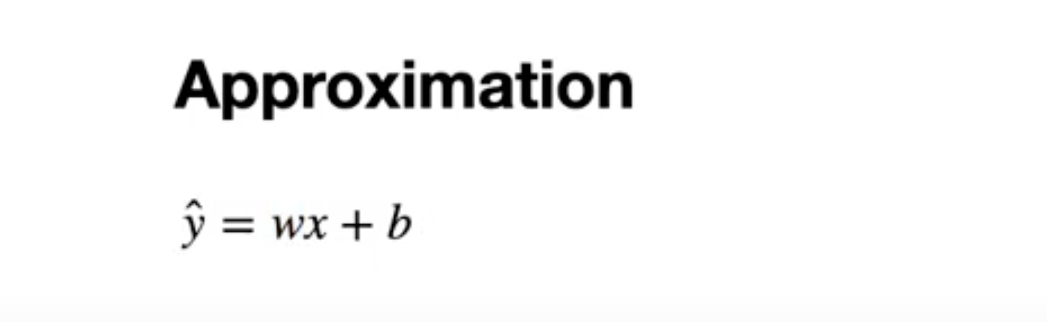

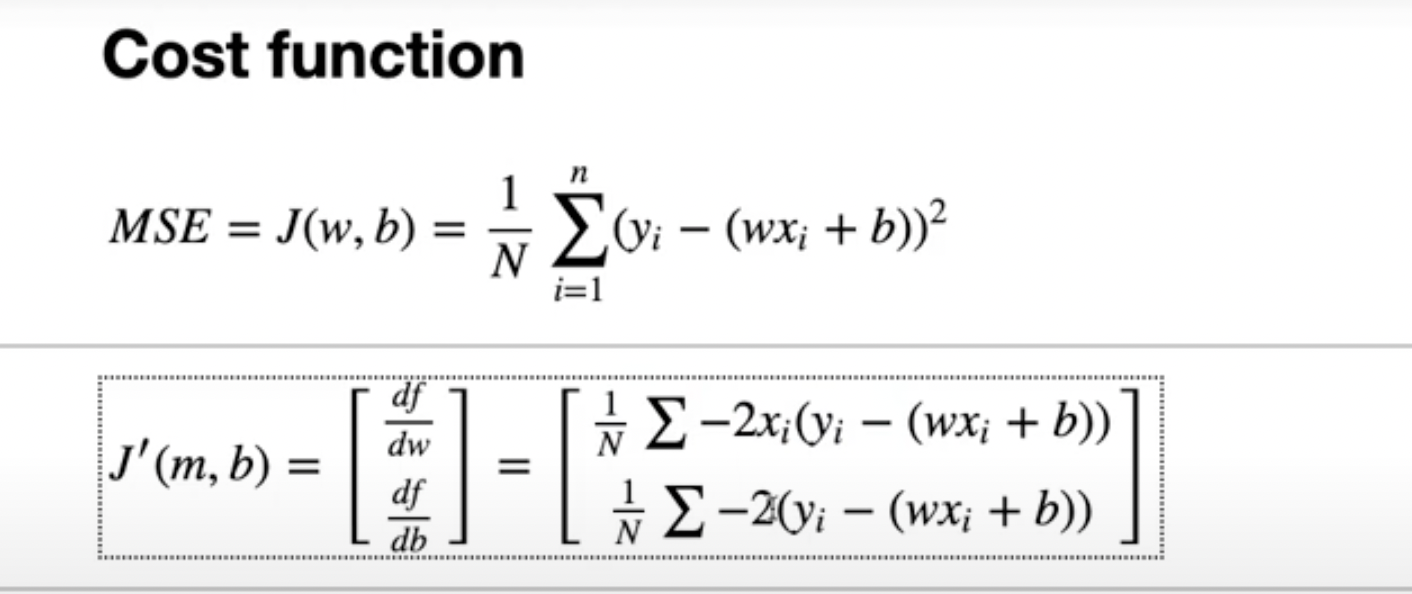

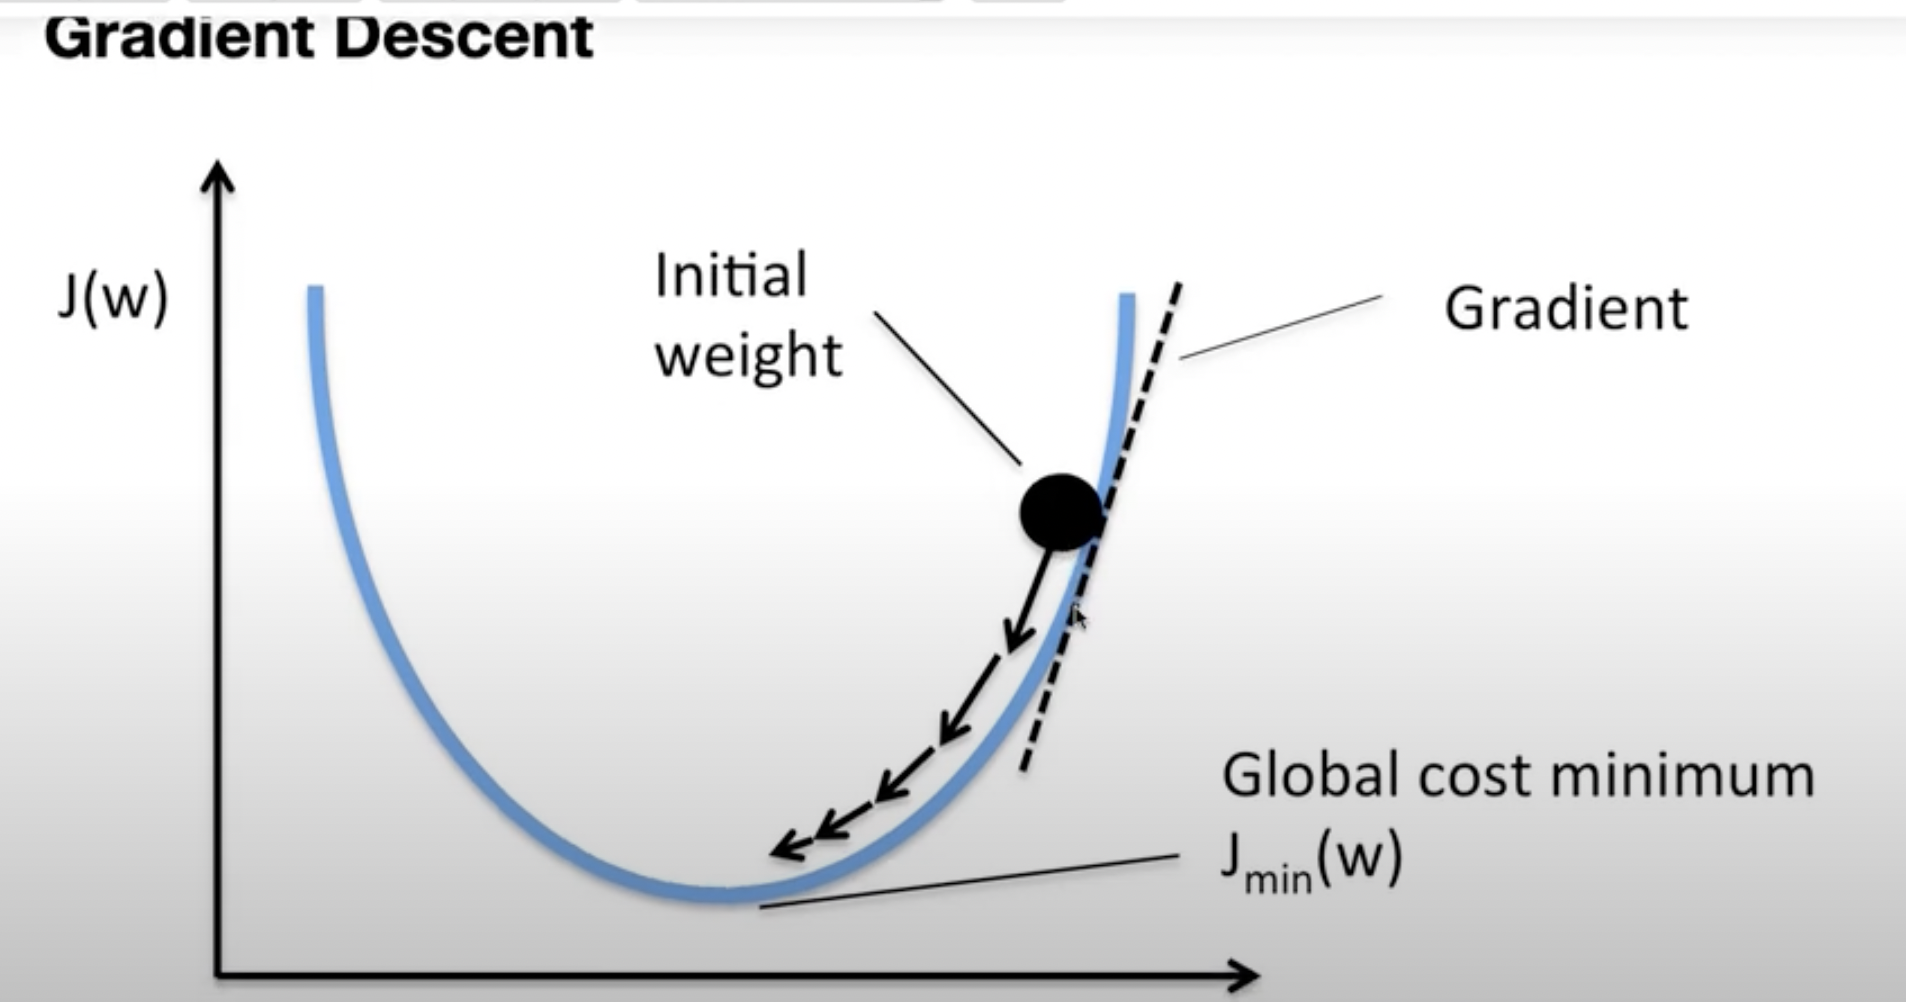

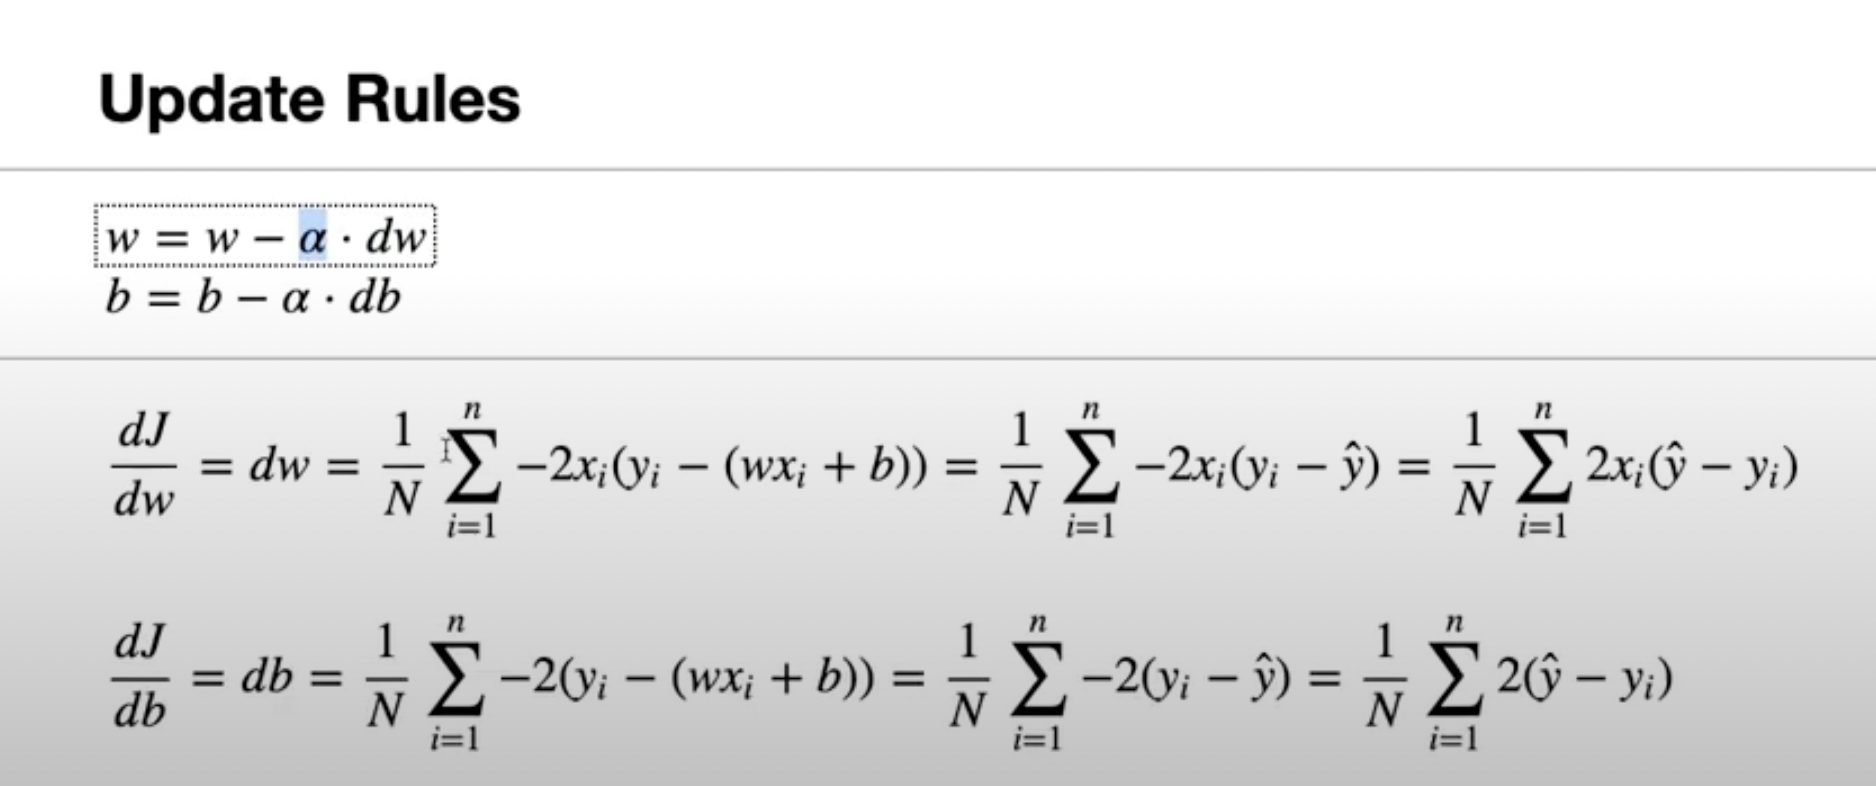


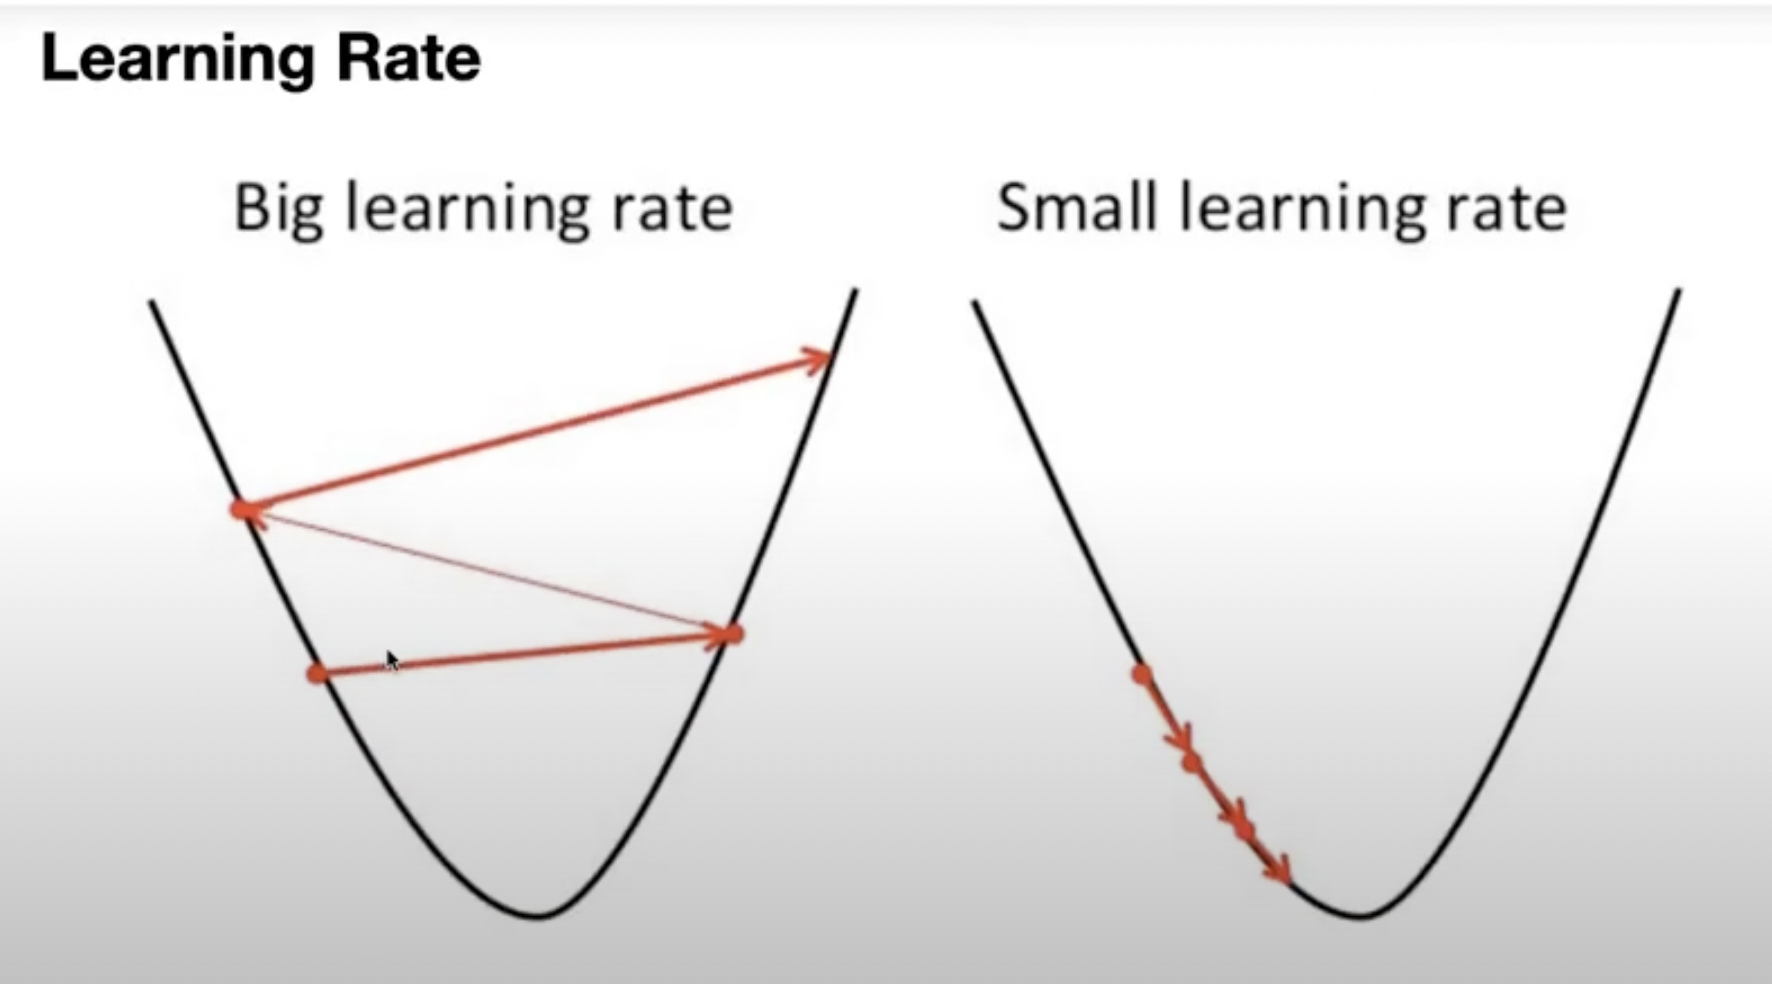

In [ ]:
import numpy as np

In [ ]:
class LinearRegression:

  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_predicted = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1/n_samples) * np.sum(y_predicted - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db


  def predict(self, X):
    y_predicted = np.dot(X, self.weights) + self.bias
    return y_predicted



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


305.7719958301902


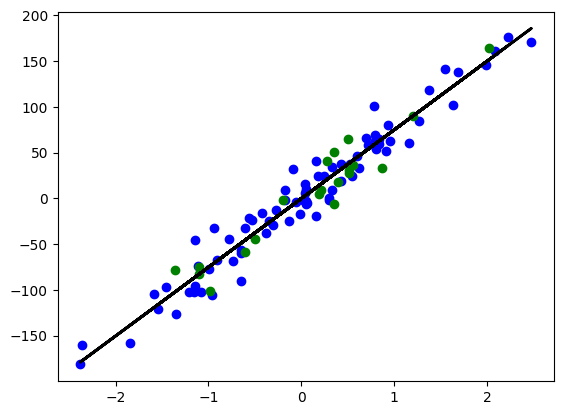

In [ ]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
  return np.mean((y_true - y_predicted)**2)

mse_value = mse(y_test, predicted)
print(mse_value)

y_pred_line = regressor.predict(X)
m1 = plt.scatter(X_train, y_train, color='blue')
m2 = plt.scatter(X_test, y_test, color='green')
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")